In [4]:
import requests
from operator import itemgetter
from bilibili import BiliSpider
import emotion_analysis

In [5]:
# 搜索近两周内按照视频热度和弹幕数前100的视频
# pagesize 每页数量 time_from 开始时间 time_to 结束时间
url = 'https://s.search.bilibili.com/cate/search?main_ver=v3&search_type=video&view_type=hot_rank&order=dm&copy_right=-1&cate_id=21&page=1&pagesize=100&jsonp=jsonp&time_from=20200613&time_to=20200627&_=1593218562408'
resp = requests.get(url)

In [6]:
# 将http请求拿到的数据json序列化
retData = resp.json()

In [7]:
import pandas as pd
# 视频数据里面主要包含bvid,author,tag等数据，存入pandas
df = pd.DataFrame.from_dict(retData['result'])

In [8]:
# 展示前5行数据
df.head()

,senddate,rank_offset,tag,duration,id,rank_score,badgepay,pubdate,author,review,...,arcrank,play,pic,description,video_review,is_pay,favorites,arcurl,bvid,title
0,1593077119,1,"互动视频,占卜,塔罗牌,塔罗,神秘学,星座,生活,全能打卡挑战,学习,原创",679,583535134,73597,False,2020-06-25 17:25:19,会星座的兔子,6635,...,0,284445,//i0.hdslb.com/bfs/archive/ea8a4520f8435923c84...,1，兔兔说：素质三连，好运连连\n2，凭你的第一直觉选择，请相信你的第一直觉\n3，评论留言...,73597,0,26619,http://www.bilibili.com/video/av583535134,BV1iz4y1Q7DU,【塔罗占卜】你的期末考试成绩到底如何？评论留言：逢考必过√
1,1592735414,2,"VLOG,生活记录,生活,翔翔大作战,小翔哥,父亲节",642,838550068,69870,False,2020-06-21 17:43:22,拜托了小翔哥,54468,...,0,6638880,//i0.hdslb.com/bfs/archive/786dc5a10305c16ce4f...,大家好，我是小翔哥，未来在各个平台，我会通过@拜托了小翔哥 继续和大家分享好吃好玩好快乐的内...,69870,0,117324,http://www.bilibili.com/video/av838550068,BV1Wg4y1q7fk,小翔哥回来了，我们重新开始
2,1593165681,3,"VLOG人生分享会,VLOG日常,记录,爱情,恋爱,新娘,求婚,情感,求婚大作战,感动",692,711151113,64556,False,2020-06-26 18:00:50,盖里老哥,12366,...,0,2010001,//i0.hdslb.com/bfs/archive/c3defd3c989c8b1c302...,有幸与你相爱，余生为你而来\n有幸命运安排，要和你一起看花海\n\n谢谢你啦，王老师~,64556,0,63621,http://www.bilibili.com/video/av711151113,BV1pD4y1Q7gd,突然向女朋友跪地求婚！相识20年，我们终于订婚了！
3,1592451903,4,"地道美食大赏,生活记录,生活,华农兄弟,华农,美食,烤鸡,农村生活,烧烤,蜂蜜",873,753577740,44482,False,2020-06-18 11:45:02,华农兄弟,4652,...,0,1958499,//i0.hdslb.com/bfs/archive/b452fba1e02d39e1356...,华农兄弟：拉了一车蜂蜜回来，搞1瓶去兄弟家烤鸡，味道还可以哟,44482,0,5615,http://www.bilibili.com/video/av753577740,BV1kk4y1z7RD,华农兄弟：拉了一车蜂蜜回来，搞1瓶去兄弟家烤鸡，味道还可以哟
4,1593267527,5,"说出你的故事,VLOG,生活记录,翔翔大作战,小翔哥,爱情,端午节",945,841195479,43185,False,2020-06-27 21:31:25,拜托了小翔哥,16966,...,0,1381531,//i0.hdslb.com/bfs/archive/78ff28dfaa120652995...,今年的端午是你的生日，想送你一片星海，装进所有的美梦，都给你。,43185,0,50599,http://www.bilibili.com/video/av841195479,BV1454y1z7NE,爱一个人，就陪她走一遍儿时的路


In [9]:
bvids = df['bvid']
dmList = list()
for bvid in bvids:
    index = bvids[bvids.values == bvid].index
    # print(df.loc[index]['bvid'])
    # spider = BiliSpider(bvid, 'video')
    spider = BiliSpider('http://www.bilibili.com/video/' + bvid)
    dmUrl = spider.getXml_url()
    dmXml = spider.parse_url(dmUrl)
    spider.write_file(dmXml)
    dmText = spider.parseXml()
    # print(dmText)
    dmList.append(dmText)

弹幕的编号是：204857167
弹幕的编号是：204240323
弹幕的编号是：205943251
弹幕的编号是：202968581
弹幕的编号是：206503427
弹幕的编号是：203886822
弹幕的编号是：205204773
弹幕的编号是：204521933
弹幕的编号是：205118712
弹幕的编号是：203212458
弹幕的编号是：203001058
弹幕的编号是：202950173
弹幕的编号是：203549297
弹幕的编号是：204488464
弹幕的编号是：203716318
弹幕的编号是：207032897
弹幕的编号是：203272566
弹幕的编号是：202868991
弹幕的编号是：204108111
弹幕的编号是：203381494
弹幕的编号是：203727112
弹幕的编号是：206426331
弹幕的编号是：205998048
弹幕的编号是：205361657
弹幕的编号是：203717150
弹幕的编号是：206124880
弹幕的编号是：205452839
弹幕的编号是：206381297
弹幕的编号是：202539010
弹幕的编号是：205206351
弹幕的编号是：206071060
弹幕的编号是：205338941
弹幕的编号是：204799640
弹幕的编号是：205283577
弹幕的编号是：204367162
弹幕的编号是：206420570
弹幕的编号是：204182831
弹幕的编号是：202565124
弹幕的编号是：202837917
弹幕的编号是：204922005
弹幕的编号是：203550375
弹幕的编号是：205317250
弹幕的编号是：204833170
弹幕的编号是：202019249
弹幕的编号是：205913542
弹幕的编号是：203221753
弹幕的编号是：205066423
弹幕的编号是：205300324
弹幕的编号是：205372451
弹幕的编号是：202686741
弹幕的编号是：202713054
弹幕的编号是：204544496
弹幕的编号是：204632587
弹幕的编号是：203476760
弹幕的编号是：205266147
弹幕的编号是：205412878
弹幕的编号是：204917593
弹幕的编号是：203619874
弹幕的编号是：2040567

In [10]:
# 获取到的弹幕信息存入表格
df['dmText'] = dmList

In [11]:
# 查看获取到的弹幕
df['dmText']

0     第三组，逢考必过第二组逢考必过第三组，逢考必过逢考必过高分稳过 一等奖学金我来啦第一组 逢考...
1     欢迎回来欢迎回来awsl三岁三岁三岁三岁苗王哈哈哈哈哈哈翔翔哥终于回来了幸福感溢出来了欢迎回...
2     祝福！沾沾喜气恭喜恭喜两个硬币随份子了，祝百年好合恭喜哇哇啊啊啊啊啊啊泪目了我我哭了要幸福啊...
3     村霸的援助哈哈哈哈哈哈哈穷追不舍鸡鸭同笼王刚你他娘的快来包围华农危一瓶蜂蜜换鸡鸭鱼哈哈哈哈哈...
4     温柔的人我真的太喜欢了泪目百年好合哈哈哈哈三碗不过岗？支持支持哟哟哟哟哟祝福淚木还在嘴硬百年...
                            ...                        
95    防不胜防啊？？？？？猝不及防？。。。。金山办公哈哈哈投币针液压2333无中生哥恭喜恭喜买买买...
96    哈哈哈哈哈哈哈对哈哈哈哈哈哈哈哈哈正道的光又寸危正道的光危？？？钓鱼执法演啊果然还是去买了吗...
97    啊啊啊啊啊啊 简直了 神仙爱情哈哈哈哈哈哈哈哈老年人+1哈哈哈哈哈哈哈哈哈绅士哈哈哈哈哈哈哈...
98    对不起不知道你当时是这个情况抱抱小贝，小贝有颗金子般的心，不必在意这些东西喜欢任何时刻的你，...
99    想嫁给光哥哈哈哈哈哈哈哈哈哈哈哈哈哈哈奇怪的东西出现了？？？？我变色了妙啊啊这个！啊啊啊啊啊...
Name: dmText, Length: 100, dtype: object

In [12]:
df['tag']

0           互动视频,占卜,塔罗牌,塔罗,神秘学,星座,生活,全能打卡挑战,学习,原创
1                      VLOG,生活记录,生活,翔翔大作战,小翔哥,父亲节
2     VLOG人生分享会,VLOG日常,记录,爱情,恋爱,新娘,求婚,情感,求婚大作战,感动
3         地道美食大赏,生活记录,生活,华农兄弟,华农,美食,烤鸡,农村生活,烧烤,蜂蜜
4               说出你的故事,VLOG,生活记录,翔翔大作战,小翔哥,爱情,端午节
                         ...                     
95                         VLOG,生活记录,印度,海外,印度人,生活
96                             VLOG,生活记录,美食,农村,海南
97                          夫夫,VLOG日常,爱情,高甜,狗粮,恋爱
98                VLOG,生活记录,生活,自制,减肥,读评论,正能量,身材羞辱
99            VLOG,洪之光,开箱,B站,开箱视频,哔哩哔哩,b站周边,周边,盲盒
Name: tag, Length: 100, dtype: object

In [13]:
# 将tag中的文本拆分为单个词语存入tagDF
tagDF = pd.DataFrame({'name': []})
for item in df['tag']:
    tagDF = pd.concat([tagDF, pd.DataFrame({'name': item.split(',')})])

In [14]:
# 统计标签词频
tagCount = tagDF.loc[:, 'name'].value_counts()

In [15]:
type(tagCount)
tagCount

VLOG         46
生活           35
生活记录         30
VLOG人生分享会    24
搞笑           21
             ..
桃花            1
成都            1
女装            1
禁毒            1
乌克兰           1
Name: name, Length: 381, dtype: int64

In [16]:
for index, value in tagCount.items():
    print(index, value)

VLOG 46
生活 35
生活记录 30
VLOG人生分享会 24
搞笑 21
吐槽 15
高能 13
自制 12
互动视频 12
全能打卡挑战 10
美食 10
沙雕日常 9
学习 9
搞笑视频 9
塔罗 8
占卜 7
爱情 7
情侣 7
记录 6
星座 6
情感 6
恋爱 6
歪果仁 6
日常 5
沙雕 5
神秘学 5
萌妹子 4
印度 4
日语 4
VLOG日常 4
日本 4
不要心动挑战赛 4
校园 4
2020高考季 3
青春有你2 3
塔罗牌 3
地道美食大赏 3
爆笑 3
可爱 3
东尼ookii 3
农村 3
开箱 3
海南 3
2020我们毕业了！ 3
奇葩 3
结婚 3
探店 3
原创 3
房地产 2
夫夫 2
黑历史 2
旅行 2
农村生活 2
女装大佬 2
美食圈 2
力元君 2
小伙 2
吃货 2
正能量 2
鬼畜 2
预测 2
开箱视频 2
端午节 2
感动 2
B站 2
读评论 2
戴萌 2
机智的党妹 2
陈睿 2
翔翔大作战 2
美国 2
海外 2
恶搞 2
幽默 2
社会 2
女朋友 2
华农兄弟 2
感人 2
假日狂欢大作战 2
毕业季 2
海鲜 2
B站11周年 2
大学 2
女友 2
运势 2
小翔哥 2
美少女 2
布偶猫 2
不要心动挑战 2
毕业 2
BILIBILI 11周年演讲 2
华农 2
挑战 2
旅游 2
占星 2
测试 2
美女 2
罗翔 2
高甜 2
OldBa1 1
新娘 1
黑皮装 1
文化 1
vlog 1
关于我的50个问题 1
六道轮回 1
纳豆奶奶 1
印度阿三 1
海洋 1
烧烤 1
老外 1
别墅 1
不要弯挑战 1
英雄联盟 1
欧洲 1
整蛊 1
RAP 1
开挂民族 1
萌妹 1
十二星座 1
留学生 1
来自未来的科幻座驾 1
盗月社 1
百万剪辑师挑战 1
魔鬼侄子 1
松浦 1
B站生日快乐 1
警察 1
德井青空 1
考试 1
指引 1
名侦探柯南 1
vlog生活 1
JR 1
迪士尼 1
砍价 1
中印战争 1
甜品 1
考研 1
催泪 1
拼多多 1
东京大明白 1
最强大脑 1
哔哩哔哩干杯 1
毕业情侣不分开 1
B站十周年 1
刘昊然 1
中日情侣 1
配音 1
不心动挑战 1
#BILIBILI 11周年演讲# 1
剧本杀 1
室内设计 1
散人 1
游艇 1

In [17]:
# 取出现频率最高的15个词语
tagTOP15 = tagCount[0:15]
tagTOP15

VLOG         46
生活           35
生活记录         30
VLOG人生分享会    24
搞笑           21
吐槽           15
高能           13
自制           12
互动视频         12
全能打卡挑战       10
美食           10
沙雕日常          9
学习            9
搞笑视频          9
塔罗            8
Name: name, dtype: int64

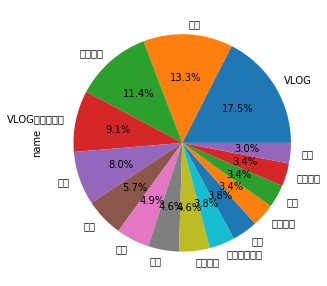

In [18]:
import matplotlib.pyplot as plt
# 占比图，中文显示有问题
plt.figure(figsize=(11, 5))
tagTOP15.plot.pie(labels=tagTOP15.index, autopct='%1.1f%%')

In [19]:
# 合并所有弹幕
dmStr = ""
for item in df['dmText']:
    dmStr += item

In [21]:
masterSpider = BiliSpider('http://www.bilibili.com/video/BV1Wg4y1q7fk')

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/r5/04386wnj4q17065n5m600z9m0000gn/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/r5/04386wnj4q17065n5m600z9m0000gn/T/jieba.cache
Loading model cost 0.880 seconds.
DEBUG:jieba:Loading model cost 0.880 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


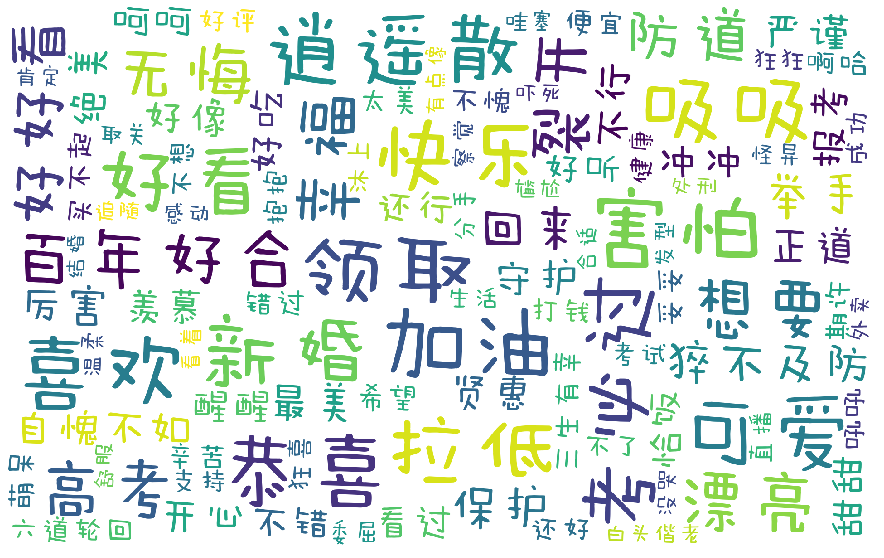

In [22]:
masterSpider.draw_word_picture(dmStr)

In [24]:
import jieba
import jieba.analyse
# 载入停用词
jieba.analyse.set_stop_words('./WordLibrary/baidu_stopwords.txt')
# TF-IDF提取前100个关键词，形容词，动词，叹词，成语等
tags = jieba.analyse.extract_tags(dmStr, topK=100, allowPOS=['Ag', 'a', 'e', 'i', 'v', 'vd', 'vn', 'y'])
','.join(tags)

'恭喜,领取,加油,吸吸,害怕,可爱,喜欢,好看,快乐,新婚,逍遥散,考必过,拉低,百年好合,无悔,想要,高考,好好看,裂开,漂亮,幸福,防道,猝不及防,保护,举手,回来,自愧不如,最美,冲冲,严谨,守护,正道,好像,厉害,开心,报考,不行,绝美,好吃,贤惠,甜甜,羡慕,还行,看过,醒醒,不错,恰饭,好听,呵呵,六道轮回,三生有幸,错过,不愧,希望,期许,啊哈,太美,便宜,好评,买不起,打钱,辛苦,妥妥,还好,萌呆,吼吼,考试,不想,直播,狂喜,健康,分手,抱抱,支持,不了,成功,沐上,委屈,狂狂,生活,怪异,察觉,白头偕老,肯定,吓死,有点像,追随,哇塞,感动,取关,尴尬,舒服,结婚,合适,发型,没哭,外卖,温柔,看着,处刑'

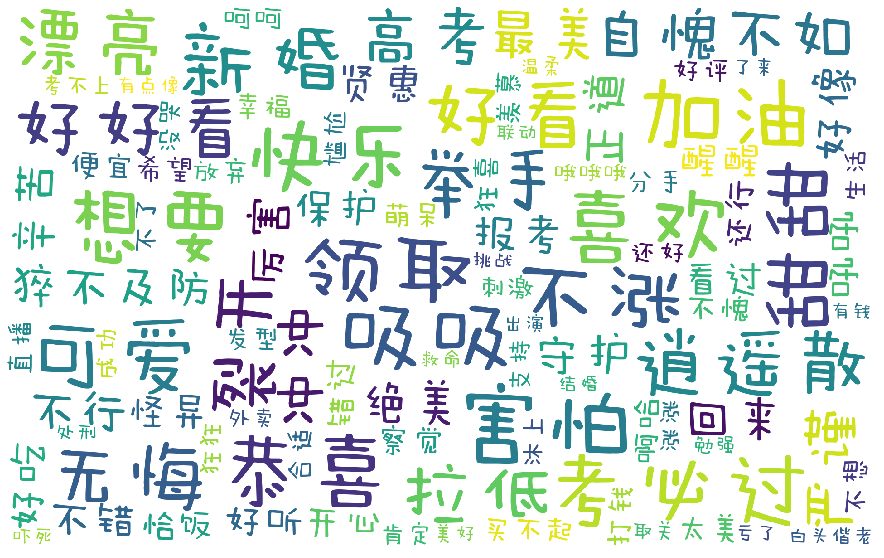

In [106]:
from scipy.misc import imread
from wordcloud import WordCloud
word_color = imread('./StyleLibrary/backColor.jpg')
font = './StyleLibrary/Tensentype-DouDouJ.ttf'
# 获取WordCloud对象
wc = WordCloud(background_color='white',
                max_words=1000,
                mask=word_color,
                font_path=font,
                random_state=15)
text = ' '.join(tags)
wc.generate(text)
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(wc)
plt.show()

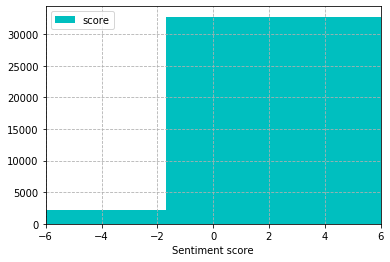

In [25]:
score=emotion_analysis.emotional_analysis(dmStr)
# 绘情感得分图
masterSpider.draw_picture(score)

In [26]:
# TextRank提取前100个关键词，形容词，动词，叹词，成语等
textRankTags = jieba.analyse.textrank(dmStr, topK=100, allowPOS=['Ag', 'e', 'i', 'v', 'vn', 'y', 'n'])
','.join(textRankTags)

'害怕,加油,泪目,喜欢,吸吸,可爱,好看,哔哩,领取,好运,卧槽,专业,老师,保护,感觉,回来,新婚,想要,中奖率,拉低,弹幕,好像,高考,举手,白醋,胖丁,百年好合,视频,兄弟,裂开,美女,逍遥散,干杯,老婆,防道,猝不及防,姐姐,少女,排面,不行,好吃,老板,正道,希望,妈妈,口音,冲冲,吉言,自愧不如,羡慕,同款,看过,心动,回家,支持,黄色,守护,呵呵,后浪,好听,生活,酸奶机,报考,人才,大学,不了,粉丝,眼睛,还行,孩子,法老,散人,爱情,声音,肯定,开心,附体,喜气,要素,不想,文化,口罩,好帅,世界,考神,衣服,狗头,恰饭,投币,好评,酒店,看着,建议,期许,男人,还好,警告,酸奶,醒醒,察觉'

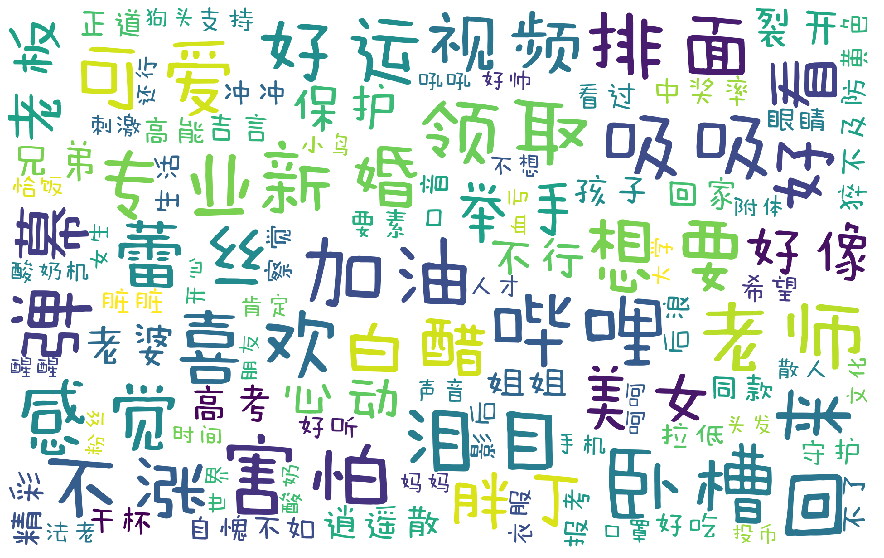

In [112]:
word_color = imread('./StyleLibrary/backColor.jpg')
font = './StyleLibrary/Tensentype-DouDouJ.ttf'
# 获取WordCloud对象
wc = WordCloud(background_color='white',
                max_words=1000,
                mask=word_color,
                font_path=font,
                random_state=15)
text = ' '.join(textRankTags)
wc.generate(text)
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(wc)
plt.show()